In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST("", train=True, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

100.1%

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


113.5%

Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw


100.4%

Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw


180.4%

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset  = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [7]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [15]:
x, y = data[0][1], data[1][1]

torch.Size([1, 28, 28])


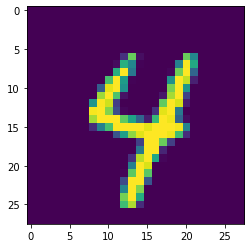

In [16]:
import matplotlib.pyplot as plt

print(x.shape)
plt.imshow(x.view(28,28))
plt.show()

In [17]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

In [18]:
for data in trainset:
    Xs, Ys = data
    for y in Ys:
        counter_dict[int(y)] += 1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [19]:
import torch.nn as nn
import torch.nn.functional as F

In [23]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [27]:
X = torch.rand((28,28))
output = net(X.view(-1, 28*28))
output

tensor([[-2.2745, -2.2311, -2.3206, -2.2590, -2.4245, -2.2451, -2.3073, -2.3047,
         -2.2907, -2.3847]], grad_fn=<LogSoftmaxBackward>)